<a href="https://colab.research.google.com/github/ahmedkhalid-01/Artificial-Intelligence/blob/main/lab3(200148).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='left' >AIR UNIVERSITY</h1>
<h1 align='left' >Department of Electrical and Computer Engineering</h1>
<h1 align='left' >Lab # 03: Informed Search</h1>
<h2 align='left' >Lab Instructor: Muhammad Awais</h2>

<h2>Objective</h2>

<p>The objective of this lab is to explore and compare different search strategies in artificial intelligence, particularly focusing on the differences between informed (heuristic-based) and uninformed (blind) search algorithms, as well as the distinction between finding any path versus finding the optimal path.</p>
<ol>
<li>Implementing and analyzing uninformed search algorithms such as branch and Bound (BnB).</li>
<li>Implementing and analyzing informed search algorithms such as A* search.</li>

</ol>

<h2> Branch and Bound </h2>
<p>The branch and bound is a depth first search based algorithm that considers the best path so far, backtracking whenever it encounters a node whose value is larger than its current upper bound. The algorithm terminates when all paths have been explored or pruned.</p>

In [ ]:
graph = {
    'A' : {'B' : 4, 'C' : 1},
    'B' : {'E' : 8, 'D' : 3, 'A' : 4},
    'C' : {'A' : 1, 'D' : 2, 'F' : 6},
    'D' : {'B' : 3, 'C' : 2, 'E' : 4},
    'E' : {'G' : 2, 'B' : 8, 'D' : 4},
    'F' : {'G' : 8, 'C' : 6},
    'G' : {'E' : 2, 'F' : 8}
}

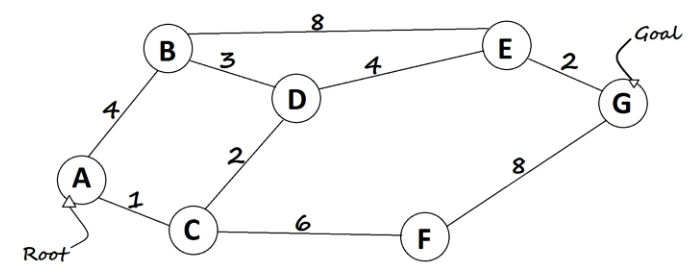

In [ ]:
from IPython import display
display.Image("B_and_B.PNG")

In [ ]:
def find_path(start, goal):
    paths = [[0, [start]]]
    while True:
        current_path = paths.pop(0)
        current_cost = current_path[0]
        current_node = current_path[1][-1]

        if goal == current_node:
            print("Cost from A to G :", current_cost)
            print("Path Found :", current_path[1])
            break
        else:
            neighbors = list(graph[current_node].keys())
            for neighbor in neighbors:
                new_cost = current_cost + graph[current_node][neighbor]
                new_path = current_path[1] + [neighbor]
                paths.append([new_cost, new_path])
            paths = sorted(paths, key=lambda x: x[0])

In [ ]:
find_path('A', 'G')

Cost from A to G : 9
Path Found : ['A', 'C', 'D', 'E', 'G']


<h3>A*</h3>
<p>A* combines the advantages of both uniform-cost search (which is guaranteed to find the optimal solution) and greedy best-first search (which is more efficient but not necessarily optimal). By using both g(n) and h(n), A* efficiently explores the search space while also ensuring optimality under certain conditions.</p>


In [ ]:
graph = {  # graph Declaration
    'S': {'A': 3, 'D': 2},
    'A': {'B': 5, 'C': 10},
    'B': {'C': 2, 'E': 1},
    'C': {'G': 4},
    'E': {'G': 3},
    'D': {'B': 1, 'E': 4},
    'G': {}
}

HeuristicDistance = {
    'S': 7,
    'A': 9,
    'B': 4,
    'C': 2,
    'D': 5,
    'E': 3,
    'G': 0
}


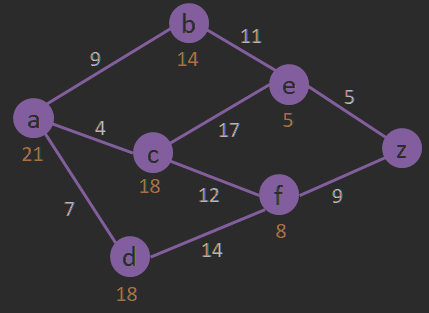

In [ ]:
from IPython import display
display.Image("img.png")

In [ ]:
import heapq

def astar(graph, start, goal, heuristic):
    priority_queue = [(0, start, [start])]
    visited = set()
    costs = {node: float('inf') for node in graph}
    costs[start] = 0

    while priority_queue:
        current_cost, current_node, current_path = heapq.heappop(priority_queue)
        if current_node == goal:
            return current_cost, current_path
        if current_node in visited:
            continue
        visited.add(current_node)
        for neighbor, cost in graph[current_node].items():
            new_cost = costs[current_node] + cost
            if new_cost < costs[neighbor]:
                costs[neighbor] = new_cost
                priority = new_cost + heuristic[neighbor]
                heapq.heappush(priority_queue, (priority, neighbor, current_path + [neighbor]))

    return float('inf'), None

In [ ]:
start_node = 'S'
goal_node = 'G'
cost, path = astar(graph, start_node, goal_node, HeuristicDistance)
if path:
    print("Cost from", start_node, "to", goal_node, ":", cost)
    print("Path Found:", path)
else:
    print("Goal node is unreachable from the start node.")

Cost from S to G : 7
Path Found: ['S', 'D', 'B', 'E', 'G']


<h3>Conclusion</h3>

In this lab, we explored and compared different search strategies in artificial intelligence, focusing on uninformed (blind) search algorithms like Branch and Bound (BnB) and informed (heuristic-based) search algorithms like A* search.

Uninformed search algorithms lack domain-specific knowledge and exhaustively explore the search space, making them computationally expensive but viable when little information is available.

In contrast, informed search algorithms like A* leverage heuristic information to guide exploration efficiently, balancing actual and estimated costs to find optimal solutions more quickly.

By implementing and analyzing both types of algorithms, we gained insights into their strengths and weaknesses, emphasizing the importance of leveraging domain knowledge for more effective problem-solving in complex environments.